In [ ]:
import sqlite3
import pandas as pd

df=pd.read_csv('/Users/susie/Documents/Proj SQL/SQL - MENTAL HEALTH/students.csv')

In [4]:
conn=sqlite3.connect('/Users/susie/Documents/Proj SQL/mentalhealth.db',timeout=10)

In [5]:
df.to_sql(name="students", con=conn, if_exists='replace', index=False)

conn.commit()

In [6]:
%load_ext sql
%sql sqlite:///mentalhealth.db

Connecting to 'sqlite:///mentalhealth.db'

In [41]:
%%sql
select *
from students

Running query in 'sqlite:///mentalhealth.db'

inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
Inter,SEA,Male,Grad,24.0,4.0,5.0,Long,3.0,Average,5.0,High,None,Yes,No,No,No,0.0,Min,34.0,23.0,9.0,11.0,8.0,11.0,2.0,27.0,91.0,5.0,5.0,6.0,3.0,2.0,1.0,4.0,1.0,3.0,4.0,None,Yes,Yes,Yes,No,No,No,No,No,No,No,No
Inter,SEA,Male,Grad,28.0,5.0,1.0,Short,4.0,High,4.0,High,None,No,No,No,No,2.0,Min,48.0,8.0,7.0,5.0,4.0,3.0,2.0,10.0,39.0,7.0,7.0,7.0,4.0,4.0,4.0,4.0,1.0,1.0,1.0,None,Yes,Yes,Yes,No,No,No,No,No,No,No,No
Inter,SEA,Male,Grad,25.0,4.0,6.0,Long,4.0,High,4.0,High,Yes,Yes,No,No,No,2.0,Min,41.0,13.0,4.0,7.0,6.0,4.0,3.0,14.0,51.0,3.0,3.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,None,No,No,No,No,No,No,No,No,No,No,No
Inter,EA,Female,Grad,29.0,5.0,1.0,Short,2.0,Low,3.0,Average,No,No,No,No,No,3.0,Min,37.0,16.0,10.0,10.0,8.0,6.0,4.0,21.0,75.0,5.0,5.0,5.0,5.0,5.0,2.0,2.0,2.0,4.0,4.0,None,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
Inter,EA,Female,Grad,28.0,5.0,1.0,Short,1.0,Low,3.0,Average,Yes,No,No,No,No,3.0,Min,37.0,15.0,12.0,5.0,8.0,7.0,4.0,31.0,82.0,5.0,5.0,5.0,2.0,5.0,2.0,5.0,5.0,4.0,4.0,None,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
Inter,SEA,Male,Grad,24.0,4.0,6.0,Long,3.0,Average,4.0,High,Yes,No,No,No,No,6.0,Mild,38.0,18.0,8.0,10.0,8.0,7.0,3.0,29.0,83.0,6.0,5.0,4.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,None,Yes,Yes,No,No,No,No,No,No,Yes,No,No
Inter,SA,Male,Grad,23.0,4.0,1.0,Short,3.0,Average,5.0,High,Yes,No,No,No,No,3.0,Min,46.0,17.0,6.0,10.0,5.0,3.0,2.0,15.0,58.0,7.0,5.0,7.0,2.0,2.0,1.0,5.0,1.0,1.0,1.0,None,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No
Inter,SEA,Female,Grad,30.0,5.0,2.0,Medium,1.0,Low,1.0,Low,Yes,Yes,Yes,No,No,9.0,Mild,41.0,16.0,20.0,19.0,15.0,11.0,6.0,40.0,127.0,7.0,2.0,2.0,2.0,6.0,2.0,1.0,1.0,3.0,1.0,None,Yes,No,No,No,Yes,No,No,No,No,No,No
Inter,SEA,Female,Grad,25.0,4.0,4.0,Long,4.0,High,4.0,High,No,No,No,Yes,Other,7.0,Mild,36.0,22.0,12.0,13.0,13.0,10.0,6.0,33.0,109.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,None,No,No,No,No,No,No,No,No,No,No,No
Inter,Others,Male,Grad,31.0,5.0,2.0,Medium,1.0,Low,4.0,High,Yes,Yes,No,No,No,3.0,Min,48.0,8.0,4.0,5.0,12.0,3.0,2.0,17.0,51.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,None,No,No,No,No,No,No,No,No,No,No,No


In [8]:
%%sql
-- Cleaning null values
select count(*) from students
where region is NULL;

Running query in 'sqlite:///mentalhealth.db'

count(*)
18


In [9]:
%%sql
-- delete all data rows where region=null
delete from students
where region is NULL;

Running query in 'sqlite:///mentalhealth.db'

18 rows affected.

++
||
++
++

In [8]:
.load /Users/susie/Downloads/sqlean-macos-arm64/stats.dylib

SyntaxError: invalid syntax (<ipython-input-8-d58b1fa45740>, line 1)

In [ ]:
%%sql
-- age and stay distribution for each region

select
    region, 
    count(*) as no_student,
    round(avg(age),2) as avg_age,
    round(avg(stay),2) as avg_stay
from students
group by region;

Running query in 'sqlite:///mentalhealth.db'

region,no_student,avg_age,avg_stay
EA,48,21.06,1.83
JAP,69,20.39,2.49
Others,11,24.45,2.18
SA,18,22.83,1.94
SEA,122,20.46,2.11


In [ ]:
df=pd.read_csv('/Users/susie/Documents/Proj SQL/SQL - MENTAL HEALTH/students.csv')

18


In [ ]:
#count how many null values in age
print(df['age'].isnull().sum())

#delete null value in age column
df = df.dropna(subset=['age'])

0


In [ ]:
import numpy as np

# Define the percentiles to calculate
percentiles = [10, 25, 50, 75, 90]

def calculate_percentiles(group):
    results = {f"{p}th Percentile": np.percentile(group['age'], p) for p in percentiles}
    return pd.Series(results)

# Group by 'region' and apply the function
percentile_results = df.groupby('region').apply(calculate_percentiles)

# Display the results
print(percentile_results)


        10th Percentile  25th Percentile  50th Percentile  75th Percentile  \
region                                                                       
EA                 18.0             19.0             20.5             22.0   
JAP                18.0             19.0             20.0             21.0   
Others             20.0             20.5             23.0             28.5   
SA                 20.7             21.0             23.0             24.0   
SEA                18.0             19.0             20.0             21.0   

        90th Percentile  
region                   
EA                 23.3  
JAP                22.0  
Others             30.0  
SA                 25.0  
SEA                23.9  


<ipython-input-48-b8298600dfaf>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_results = df.groupby('region').apply(calculate_percentiles)


In [ ]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 939.0 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


<ipython-input-44-4c9a3a15e060>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='age', data=df, palette='Set2')


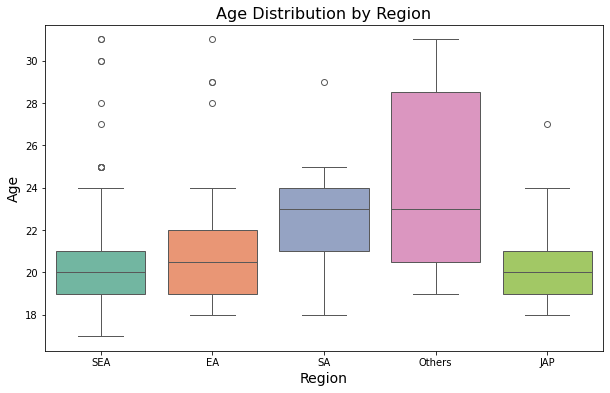

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataset for international students - optional
# inter_students = df[df['inter_dom'] == 'Inter'] 

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='age', data=df, palette='Set2')

# Add title and labels
plt.title('Age Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Display the plot
plt.show()

In [ ]:
#The ‘tosc’ field represents the total score of social connectedness (SCS test). The SCS test is a 20-item scale that assesses based on belonging, closeness, support, and satisfaction. To complete the SCS, individuals are asked to rate each item on a 6-point Likert scale, from 1 (strongly disagree) to 6 (strongly agree). The total score is calculated by summing the scores for all 20 items. Higher scores on the SCS indicate a greater sense of social connectedness (This excerpt was taken from the website below). https://scales.arabpsychology.com/s/social-connectedness-scale/ => HIGHER TOSC ARE GOOD AND VICE VERSA

# categorizing tosc group by percentile analysis

# Define the percentiles to calculate
percentiles = [25, 50, 75]

def calculate_percentiles(group):
    results = {f"{p}th Percentile": np.percentile(group['tosc'], p) for p in percentiles}
    return pd.Series(results)

# Group by 'inter_dom' and apply the function
percentile_tosc = df.groupby('inter_dom').apply(calculate_percentiles)

# Display the results
print(percentile_tosc)

           25th Percentile  50th Percentile  75th Percentile
inter_dom                                                   
Dom                   31.5             39.0             47.0
Inter                 31.0             40.0             45.0


<ipython-input-66-016c1e2c58e0>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  percentile_tosc = df.groupby('inter_dom').apply(calculate_percentiles)


In [22]:
%config SqlMagic.displaylimit = None

displaylimit: Value None will be treated as 0 (no limit)

In [ ]:
%%sql
--> those who in low_csc group have more tendency to suicide (23/42) 
--> having low and mod csc score can result in mod to sev regarding depression severity 

SELECT 
    tosc_grp,
    depsev,
    COUNT(*) AS no_student
FROM (
    SELECT *,
           CASE 
               WHEN tosc < 31 THEN 'low_tosc'
               WHEN tosc >= 31 AND tosc < 47 THEN 'moderate_tosc'
               ELSE 'high_tosc'
           END AS tosc_grp
    FROM students
) AS categorized_students
WHERE inter_dom = 'Inter'
GROUP BY tosc_grp, depsev
ORDER BY tosc_grp, depsev DESC

Running query in 'sqlite:///mentalhealth.db'

tosc_grp,depsev,no_student
high_tosc,Mod,7
high_tosc,Min,23
high_tosc,Mild,8
low_tosc,Sev,4
low_tosc,ModSev,10
low_tosc,Mod,13
low_tosc,Min,2
low_tosc,Mild,13
moderate_tosc,Sev,1
moderate_tosc,ModSev,1


Correlation between length of stay and age: 0.3022344286104206
Correlation Matrix:
           tosc     todep      toas
tosc   1.000000 -0.551795 -0.555860
todep -0.551795  1.000000  0.394095
toas  -0.555860  0.394095  1.000000


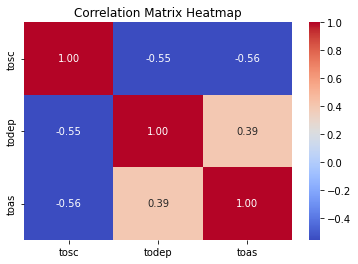

In [ ]:
# correlation bw students’ language proficiency (japanese, english) and their mental health indicators?
correlation = df['stay'].corr(df['age'])  
print(f"Correlation between length of stay and age: {correlation}")

# Correlation matric for 3 score
mentalhealth_score = ['tosc', 'todep', 'toas']  
correlation_matrix = df[mentalhealth_score].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

Correlation Matrix:
               apd     ahome       aph     afear       acs    aguilt  \
apd       1.000000  0.371330  0.647512  0.572421  0.447805  0.310699   
ahome     0.371330  1.000000  0.397227  0.435714  0.460867  0.412860   
aph       0.647512  0.397227  1.000000  0.640884  0.466109  0.341833   
afear     0.572421  0.435714  0.640884  1.000000  0.412650  0.430499   
acs       0.447805  0.460867  0.466109  0.412650  1.000000  0.402508   
aguilt    0.310699  0.412860  0.341833  0.430499  0.402508  1.000000   
amiscell  0.578559  0.506480  0.546033  0.570425  0.646505  0.497840   
toas      0.803785  0.665134  0.781058  0.759536  0.706895  0.573604   

          amiscell      toas  
apd       0.578559  0.803785  
ahome     0.506480  0.665134  
aph       0.546033  0.781058  
afear     0.570425  0.759536  
acs       0.646505  0.706895  
aguilt    0.497840  0.573604  
amiscell  1.000000  0.870102  
toas      0.870102  1.000000  


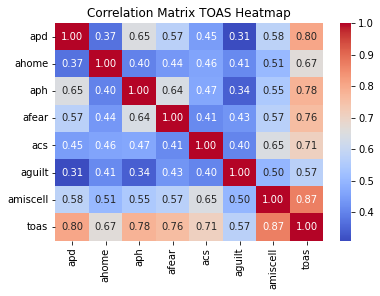

In [48]:
# Correlation matric for toas score
toas_score = ['apd','ahome','aph','afear','acs','aguilt','amiscell','toas']  
correlation_matrix = df[toas_score].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix TOAS Heatmap')
plt.show()

In [47]:
%%sql
select
    stay,
    round(avg(todep),2) as avg_phq,
    round(avg(toas),2) as avg_as,
    round(avg(tosc),2) as avg_scs
from students
group by stay;

Running query in 'sqlite:///mentalhealth.db'

stay,avg_phq,avg_as,avg_scs
1.0,7.7,71.03,37.94
2.0,8.58,74.87,37.08
3.0,8.87,71.35,37.78
4.0,7.96,78.74,35.0
5.0,7.67,89.0,34.0
6.0,6.0,58.67,38.0
7.0,4.0,45.0,48.0
8.0,10.0,65.0,44.0
10.0,13.0,50.0,32.0


In [ ]:
%%sql
-- percentage of suicide (mệt quá làm sau)
select
    suicide,
    count(*)/(select count(*) from students)*1 
from students
group by suicide

Running query in 'sqlite:///mentalhealth.db'

suicide,count(*)/(select count(*) from students)*1
No,0
Yes,0
